In [94]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


data_path = '/Users/admin/Library/CloudStorage/OneDrive-GettysburgCollege/DS325/Baza customer Telecom v2.csv' 
df = pd.read_csv(data_path)

print(df.shape)
display(df.head())
df.describe() 


(8453, 14)


,PID,CRM_PID_Value_Segment,EffectiveSegment,Billing_ZIP,KA_name,Active_subscribers,Not_Active_subscribers,Suspended_subscribers,Total_SUBs,AvgMobileRevenue,AvgFIXRevenue,TotalRevenue,ARPU,CHURN
0,123759242,Bronze,SOHO,6000.0,VM,2,NaN,NaN,2,40.17,0.0,40.17,NaN,No
1,126145737,Bronze,SOHO,6400.0,VM,3,NaN,NaN,3,40.17,0.0,40.17,13.39,No
2,123506355,Bronze,SOHO,6000.0,DI,2,3.0,NaN,5,40.17,0.0,40.17,20.09,No
3,112595585,Bronze,SOHO,4400.0,MT,1,2.0,NaN,3,40.17,0.0,40.17,40.17,No
4,115097935,Iron,SOHO,4000.0,AD,2,1.0,NaN,3,40.17,0.0,40.17,20.09,No


,Billing_ZIP,Active_subscribers,Not_Active_subscribers,Suspended_subscribers,Total_SUBs,AvgMobileRevenue,AvgFIXRevenue,TotalRevenue,ARPU
count,8451.000000,8453.000000,4304.000000,352.000000,8453.000000,8453.000000,8453.000000,8453.000000,8452.000000
mean,4879.727725,7.774636,4.163336,1.576705,9.960132,148.011956,0.821185,148.833141,24.441789
std,1061.095394,6.680524,9.462847,1.979905,10.246648,102.570539,11.737880,103.250779,22.820585
min,1000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.670000,0.000000
25%,4003.000000,4.000000,1.000000,1.000000,5.000000,71.500000,0.000000,71.830000,14.070000
50%,4400.000000,6.000000,2.000000,1.000000,7.000000,113.170000,0.000000,113.670000,19.315000
75%,6000.000000,10.000000,4.000000,1.000000,12.000000,191.170000,0.000000,192.330000,27.255000
max,9644.000000,110.000000,214.000000,22.000000,235.000000,499.830000,480.500000,499.830000,462.830000


In [95]:
# Inspect missing values
missing = df.isnull().sum()
print("Dataset missing values:")
display(missing)

# Impute subscriber count nulls with 0
df['Not_Active_subscribers'] = df['Not_Active_subscribers'].fillna(0)
df['Suspended_subscribers'] = df['Suspended_subscribers'].fillna(0)

# Handle ARPU nulls
computed_arpu = df['TotalRevenue'] / df['Active_subscribers'].replace(0, pd.NA)
df['ARPU'] = df['ARPU'].fillna(computed_arpu).fillna(0)

# Convert 'CHURN' to numeric 0 and 1 
df['CHURN'] = df['CHURN'].map({'No': 0, 'Yes': 1})

print("\nList of missing values (after imputation):")
display(df.isnull().sum())

display(df[['Not_Active_subscribers','Suspended_subscribers','ARPU','CHURN']].head())



Dataset missing values:


PID                          0
CRM_PID_Value_Segment        5
EffectiveSegment             0
Billing_ZIP                  2
KA_name                      0
Active_subscribers           0
Not_Active_subscribers    4149
Suspended_subscribers     8101
Total_SUBs                   0
AvgMobileRevenue             0
AvgFIXRevenue                0
TotalRevenue                 0
ARPU                         1
CHURN                        0
dtype: int64


List of missing values (after imputation):


PID                       0
CRM_PID_Value_Segment     5
EffectiveSegment          0
Billing_ZIP               2
KA_name                   0
Active_subscribers        0
Not_Active_subscribers    0
Suspended_subscribers     0
Total_SUBs                0
AvgMobileRevenue          0
AvgFIXRevenue             0
TotalRevenue              0
ARPU                      0
CHURN                     0
dtype: int64

,Not_Active_subscribers,Suspended_subscribers,ARPU,CHURN
0,0.0,0.0,20.085,0
1,0.0,0.0,13.390,0
2,3.0,0.0,20.090,0
3,2.0,0.0,40.170,0
4,1.0,0.0,20.090,0


In [96]:
#Clean column names (strip whitespace)
df.columns = df.columns.str.strip()

# Calculate total subscribers 
df['subs_sum'] = (
    df['Active_subscribers'] +
    df['Not_Active_subscribers'] +
    df['Suspended_subscribers']
)
subs_mismatch = df['subs_sum'] != df['Total_SUBs']
subs_mismatch_count = subs_mismatch.sum()


# Calculate total revenue and round to cents for comparison
mobile_fix_sum = (df['AvgMobileRevenue'] + df['AvgFIXRevenue']).round(2)
total_rev = df['TotalRevenue'].round(2)
rev_mismatch = mobile_fix_sum != total_rev
rev_mismatch_count = rev_mismatch.sum()


print(f"Number of mismatches subscribers: {subs_mismatch_count} of {len(df)}")
print(f"Toal revenue mismatches: {rev_mismatch_count} of {len(df)}")

# Display mismatches to understand easier 
if subs_mismatch_count > 0:
    display(df.loc[subs_mismatch, 
                   ['PID', 'Active_subscribers', 'Not_Active_subscribers', 
                    'Suspended_subscribers', 'Total_SUBs', 'subs_sum']].head())

if rev_mismatch_count > 0:
    display(df.loc[rev_mismatch, 
                   ['PID', 'AvgMobileRevenue', 'AvgFIXRevenue', 
                    'TotalRevenue']].head())
    



Number of mismatches subscribers: 0 of 8453
Toal revenue mismatches: 0 of 8453


In [97]:
# Handle missing Billing_ZIP and create ZIP_region
df['Billing_ZIP'] = df['Billing_ZIP'].fillna(0).astype(int).astype(str)
df['ZIP_region'] = df['Billing_ZIP'].str[:2]

# Define feature lists
categorical_features = [
    'CRM_PID_Value_Segment', 
    'EffectiveSegment', 
    'KA_name', 
    'ZIP_region'
]
numeric_features = [
    'Active_subscribers', 
    'Not_Active_subscribers', 
    'Suspended_subscribers', 
    'Total_SUBs',
    'AvgMobileRevenue', 
    'AvgFIXRevenue', 
    'TotalRevenue', 
    'ARPU'
]

# Convert to categorical dtype
df[categorical_features] = df[categorical_features].astype('category')

# Build preprocessing pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_features),
    ('cat', categorical_pipeline, categorical_features)
])


In [98]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Prepare features and target
feature_cols = numeric_features + categorical_features
X = df[feature_cols]
y = df['CHURN']

RANDOM_STATE = 42 

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
)

# Logistic Regression
clf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear', random_state=RANDOM_STATE))
])

# Fit the model
clf_pipeline.fit(X_train, y_train)

# Predictions and Probabilities
y_pred = clf_pipeline.predict(X_test)
y_proba = clf_pipeline.predict_proba(X_test)[:, 1]

# Evaluation Metrics
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))

roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {roc_auc:.3f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Classification Report:
              precision    recall  f1-score   support

    No Churn       0.93      1.00      0.97      1581
       Churn       0.00      0.00      0.00       110

    accuracy                           0.93      1691
   macro avg       0.47      0.50      0.48      1691
weighted avg       0.87      0.93      0.90      1691

ROC AUC Score: 0.580

Confusion Matrix:
[[1581    0]
 [ 110    0]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [115]:
numeric_features = [
    'Active_subscribers','Not_Active_subscribers','Suspended_subscribers',
    'Total_SUBs','AvgMobileRevenue','AvgFIXRevenue','TotalRevenue','ARPU'
]
categorical_features = [
    'CRM_PID_Value_Segment','EffectiveSegment','KA_name','ZIP_region'
]
df[categorical_features] = df[categorical_features].astype('category')

# Build preprocessor
numeric_pipeline = Pipeline([('scaler', StandardScaler())])
categorical_pipeline = Pipeline([('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_features),
    ('cat', categorical_pipeline, categorical_features)
])

# Split
X = df[numeric_features + categorical_features]
y = df['CHURN']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
)

# Random Forest
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=100, 
        random_state=RANDOM_STATE, 
        class_weight='balanced'
    ))
])
rf_pipeline.fit(X_train, y_train)


y_pred = rf_pipeline.predict(X_test)
y_proba = rf_pipeline.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred, target_names=['No Churn','Churn'], zero_division=0))
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.3f}")
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

    No Churn       0.93      1.00      0.96      1581
       Churn       0.00      0.00      0.00       110

    accuracy                           0.93      1691
   macro avg       0.47      0.50      0.48      1691
weighted avg       0.87      0.93      0.90      1691

ROC AUC: 0.575
[[1575    6]
 [ 110    0]]


In [116]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=100,
        class_weight='balanced',
        random_state=RANDOM_STATE
    ))
])

rf_pipeline.fit(X_train, y_train)

y_pred = rf_pipeline.predict(X_test)
y_proba = rf_pipeline.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred, target_names=['No Churn','Churn'], zero_division=0))
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.3f}")
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

    No Churn       0.93      1.00      0.96      1581
       Churn       0.00      0.00      0.00       110

    accuracy                           0.93      1691
   macro avg       0.47      0.50      0.48      1691
weighted avg       0.87      0.93      0.90      1691

ROC AUC: 0.575
[[1575    6]
 [ 110    0]]


In [117]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid
param_dist = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['sqrt', 'log2']
}

# Randomized search
rs_rf = RandomizedSearchCV(
    estimator=Pipeline([
        ('prep', preprocessor),
        ('classifier', RandomForestClassifier(
            class_weight='balanced',
            random_state=RANDOM_STATE
        ))
    ]),
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=RANDOM_STATE,
    verbose=1
)
rs_rf.fit(X_train, y_train)

print("Best parameters:", rs_rf.best_params_)
print(f"Best CV ROC AUC: {rs_rf.best_score_:.3f}\n")

# Test-set evaluation
best_rf = rs_rf.best_estimator_
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]

print("Tuned Random Forest")
print(classification_report(y_test, y_pred, target_names=['No Churn','Churn'], zero_division=0))
print(f"Test ROC AUC: {roc_auc_score(y_test, y_proba):.3f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'classifier__n_estimators': 200, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 4, 'classifier__max_features': 'sqrt', 'classifier__max_depth': 10}
Best CV ROC AUC: 0.582

Tuned Random Forest
              precision    recall  f1-score   support

    No Churn       0.94      0.86      0.90      1581
       Churn       0.10      0.21      0.13       110

    accuracy                           0.82      1691
   macro avg       0.52      0.54      0.52      1691
weighted avg       0.89      0.82      0.85      1691

Test ROC AUC: 0.567
Confusion Matrix:
 [[1363  218]
 [  87   23]]


In [118]:
from sklearn.ensemble import GradientBoostingClassifier

# Build pipeline
gb_pipeline = Pipeline([
    ('prep', preprocessor),
    ('clf', GradientBoostingClassifier(random_state=RANDOM_STATE))
])

gb_pipeline.fit(X_train, y_train)

# Predict
y_pred_gb  = gb_pipeline.predict(X_test)
y_proba_gb = gb_pipeline.predict_proba(X_test)[:, 1]

print("Baseline Gradient Boosting")
print(classification_report(y_test, y_pred_gb, target_names=['No Churn','Churn'], zero_division=0))
print(f"ROC AUC: {roc_auc_score(y_test, y_proba_gb):.3f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))


Baseline Gradient Boosting
              precision    recall  f1-score   support

    No Churn       0.93      1.00      0.97      1581
       Churn       0.00      0.00      0.00       110

    accuracy                           0.93      1691
   macro avg       0.47      0.50      0.48      1691
weighted avg       0.87      0.93      0.90      1691

ROC AUC: 0.579
Confusion Matrix:
 [[1581    0]
 [ 110    0]]


In [119]:
feature_names = preprocessor.get_feature_names_out()

# Extract important features from the best RF model
best_rf = rs_rf.best_estimator_.named_steps['classifier']
importances = best_rf.feature_importances_

feat_imp_df = (
    pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    })
    .sort_values('importance', ascending=False)
    .reset_index(drop=True)
)
print(feat_imp_df.head(10))


                       feature  importance
0            num__TotalRevenue    0.140315
1        num__AvgMobileRevenue    0.139492
2                    num__ARPU    0.120612
3              num__Total_SUBs    0.092981
4      num__Active_subscribers    0.084986
5  num__Not_Active_subscribers    0.061111
6           cat__ZIP_region_61    0.016072
7           cat__ZIP_region_60    0.014917
8   cat__EffectiveSegment_SOHO    0.014644
9    cat__EffectiveSegment_VSE    0.014551


In [120]:
#Coeficents
lr = clf_balanced.named_steps['classifier']
coefs = lr.coef_[0]
coef_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefs
}).sort_values('coefficient', key=abs, ascending=False).reset_index(drop=True)

print(coef_df.head(10))


                           feature  coefficient
0               cat__ZIP_region_88     1.821485
1  cat__CRM_PID_Value_Segment_Lead    -1.416467
2               cat__ZIP_region_89    -1.412489
3               cat__ZIP_region_82     1.394888
4               cat__ZIP_region_69     1.363668
5               cat__ZIP_region_16     1.223595
6               cat__ZIP_region_80     1.171198
7               cat__ZIP_region_58     1.153002
8               cat__ZIP_region_86     1.087824
9               cat__ZIP_region_49    -1.053516


In [121]:
from sklearn.inspection import permutation_importance
from scipy.sparse import issparse


# Test set
X_test_trans = preprocessor.transform(X_test)
if issparse(X_test_trans):
    X_test_trans = X_test_trans.toarray()

# Compute permutation importances on AUC
perm = permutation_importance(
    best_rf, 
    X_test_trans, 
    y_test, 
    n_repeats=10, 
    random_state=RANDOM_STATE, 
    scoring='roc_auc'
)

feature_names = preprocessor.get_feature_names_out()
perm_df = (
    pd.DataFrame({
        'feature': feature_names,
        'importance_mean': perm.importances_mean,
        'importance_std':  perm.importances_std
    })
    .sort_values('importance_mean', ascending=False)
    .head(10)
    .reset_index(drop=True)
)

print(perm_df.to_string(index=False))


                            feature  importance_mean  importance_std
              num__AvgMobileRevenue         0.028604        0.017313
                  num__TotalRevenue         0.022974        0.010261
                 cat__ZIP_region_65         0.007149        0.004303
                    cat__KA_name_DI         0.006618        0.003877
                          num__ARPU         0.006402        0.006108
                 cat__ZIP_region_63         0.004181        0.002045
          cat__KA_name_Jenia Gogova         0.003864        0.003129
                 cat__ZIP_region_47         0.002807        0.000892
    cat__CRM_PID_Value_Segment_Gold         0.002636        0.004023
cat__CRM_PID_Value_Segment_Platinum         0.002555        0.001467


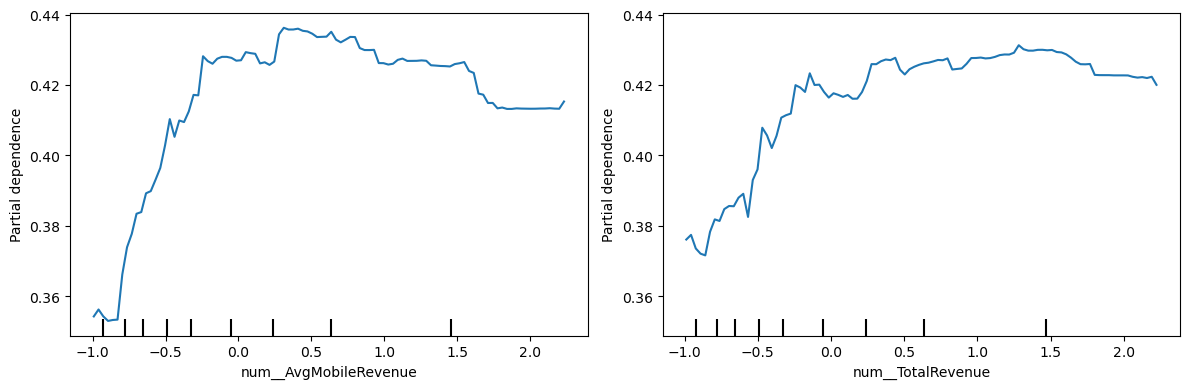

In [124]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

# Top drivers from permutation importances
top_features = perm_df['feature'].tolist()[:2]

# 3. Plot partial dependence for those features
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
PartialDependenceDisplay.from_estimator(
    best_rf,
    X_test_trans,
    features=top_features,
    feature_names=preprocessor.get_feature_names_out(),
    ax=ax
)
plt.tight_layout()
plt.show()


/var/folders/06/kk3v10sj7931bhvb4m36h_j80000gn/T/ipykernel_35264/1201580681.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seg_df = df.groupby('CRM_PID_Value_Segment')['CHURN'] \
/var/folders/06/kk3v10sj7931bhvb4m36h_j80000gn/T/ipykernel_35264/1201580681.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


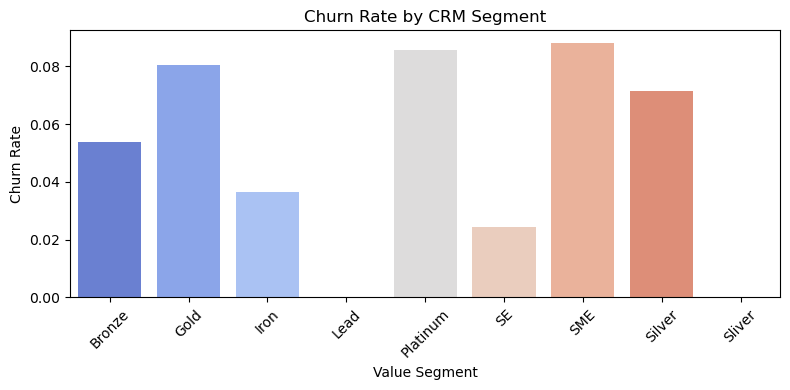

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assemble segments and churn rate
seg_df = df.groupby('CRM_PID_Value_Segment')['CHURN'] \
           .mean() \
           .sort_values(ascending=False) \
           .reset_index()

plt.figure(figsize=(8,4))
sns.barplot(
    data=seg_df,
    x='CRM_PID_Value_Segment',
    y='CHURN',
    palette='coolwarm'
)
plt.ylabel('Churn Rate')
plt.xlabel('Value Segment')
plt.title('Churn Rate by CRM Segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/06/kk3v10sj7931bhvb4m36h_j80000gn/T/ipykernel_35264/2195116264.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data=df.groupby('EffectiveSegment')['CHURN']
/var/folders/06/kk3v10sj7931bhvb4m36h_j80000gn/T/ipykernel_35264/2195116264.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


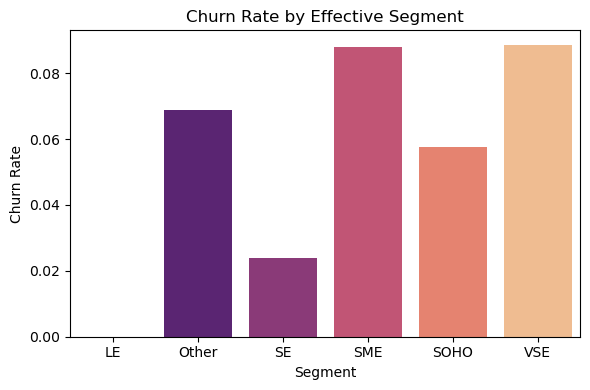

In [108]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=df.groupby('EffectiveSegment')['CHURN']
           .mean()
           .sort_values(ascending=False)
           .reset_index(),
    x='EffectiveSegment',
    y='CHURN',
    palette='magma'
)
plt.title('Churn Rate by Effective Segment')
plt.ylabel('Churn Rate')
plt.xlabel('Segment')
plt.tight_layout()
plt.show()


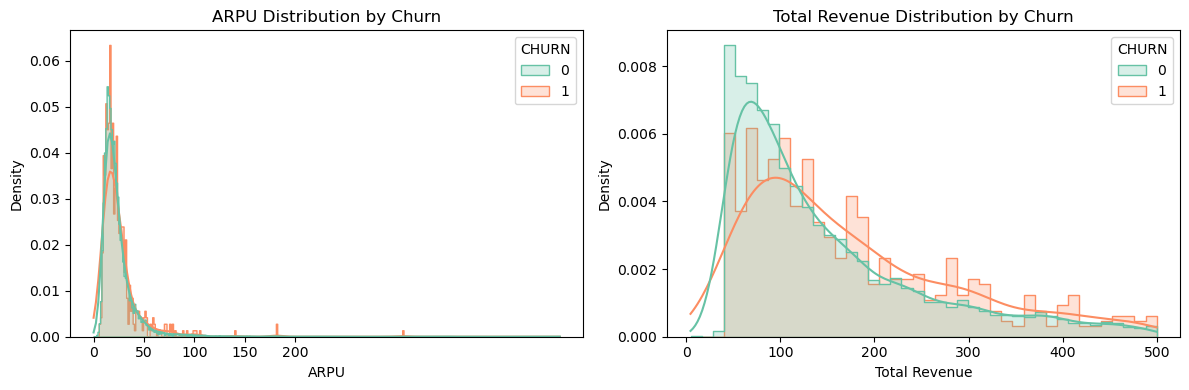

In [126]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# ARPU distribution
sns.histplot(
    data=df,
    x="ARPU",
    hue="CHURN",
    kde=True,
    stat="density",
    common_norm=False,
    element="step",
    palette="Set2",
    ax=axes[0]
)
axes[0].set(
    title="ARPU Distribution by Churn",
    xlabel="ARPU",
    ylabel="Density",
    xticks=[0, 50, 100, 150, 200]
)

# TotalRevenue distribution
sns.histplot(
    data=df,
    x="TotalRevenue",
    hue="CHURN",
    kde=True,
    stat="density",
    common_norm=False,
    element="step",
    palette="Set2",
    ax=axes[1]
)
axes[1].set(
    title="Total Revenue Distribution by Churn",
    xlabel="Total Revenue",
    ylabel="Density",
    xticks=[0, 100, 200, 300, 400, 500]
)

plt.tight_layout()
plt.show()

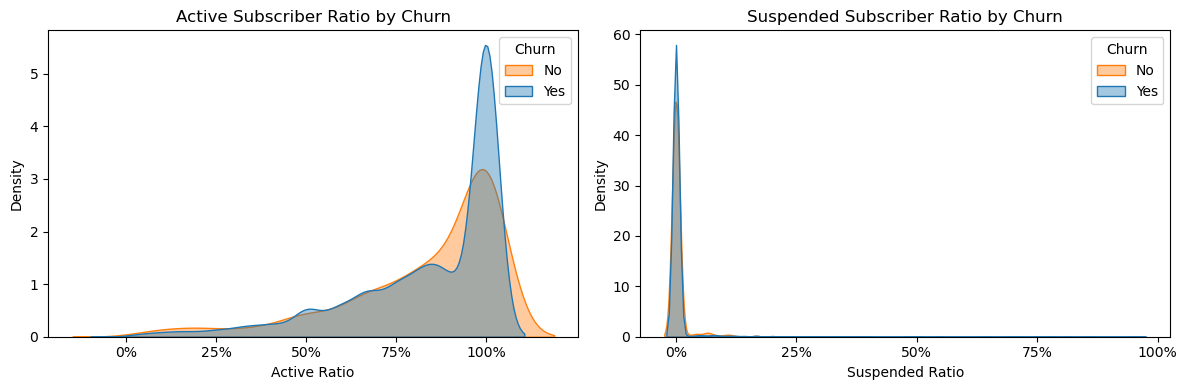

In [128]:
#Calculate subscriberes ratio 
df['active_ratio']    = df['Active_subscribers']    / df['Total_SUBs']
df['suspended_ratio'] = df['Suspended_subscribers'] / df['Total_SUBs']

# Plot KDEs side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Active ratio KDE
sns.kdeplot(
    data=df,
    x='active_ratio',
    hue='CHURN',
    common_norm=False,
    fill=True,
    alpha=0.4,
    ax=axes[0]
)
axes[0].set(
    title='Active Subscriber Ratio by Churn',
    xlabel='Active Ratio',
    ylabel='Density',
    xticks=[0, 0.25, 0.5, 0.75, 1.0],
    xticklabels=['0%', '25%', '50%', '75%', '100%']
)
axes[0].legend(title='Churn', labels=['No', 'Yes'])

# Suspended ratio KDE
sns.kdeplot(
    data=df,
    x='suspended_ratio',
    hue='CHURN',
    common_norm=False,
    fill=True,
    alpha=0.4,
    ax=axes[1]
)
axes[1].set(
    title='Suspended Subscriber Ratio by Churn',
    xlabel='Suspended Ratio',
    ylabel='Density',
    xticks=[0, 0.25, 0.5, 0.75, 1.0],
    xticklabels=['0%', '25%', '50%', '75%', '100%']
)
axes[1].legend(title='Churn', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()


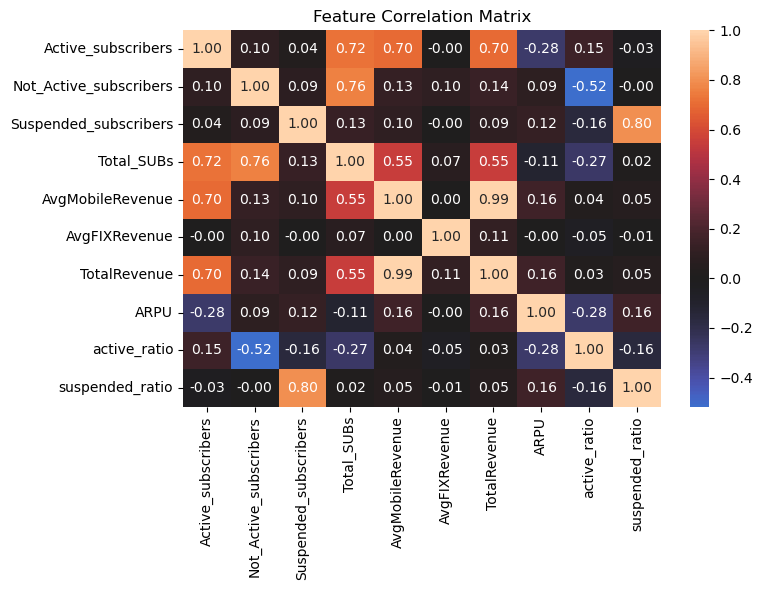

In [133]:
plt.figure(figsize=(8,6))
sns.heatmap(
    df[numeric_features + ['active_ratio','suspended_ratio']] \
      .corr(),
    annot=True, fmt='.2f', center=0
)

plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()


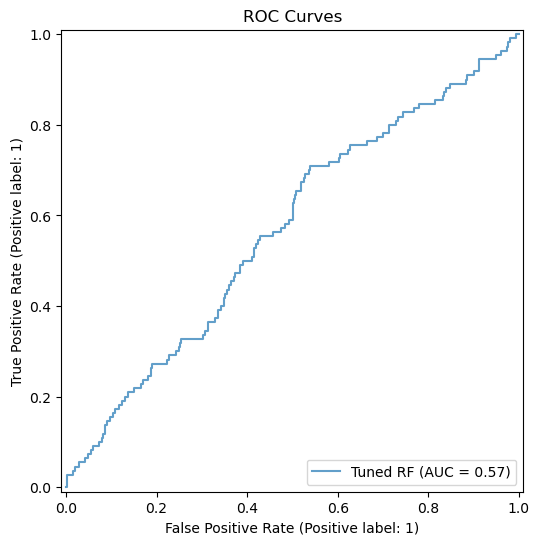

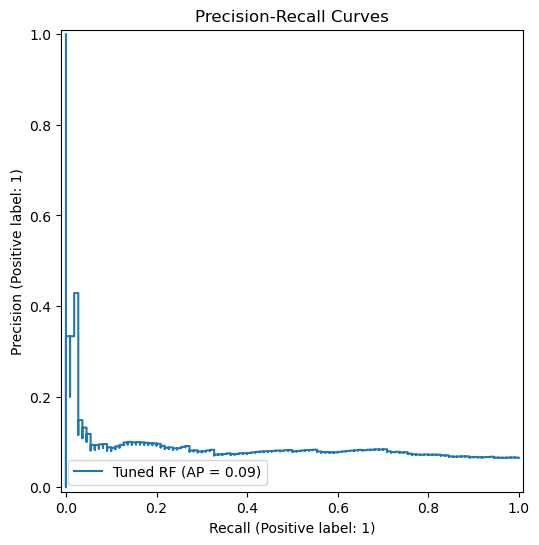

In [134]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

best_pipeline = rs_rf.best_estimator_

# ROC curve
fig, ax = plt.subplots(figsize=(6,6))
RocCurveDisplay.from_estimator(
    best_pipeline, 
    X_test, 
    y_test, 
    name='Tuned RF', 
    alpha=0.7, 
    ax=ax
)

ax.set_title('ROC Curves')
plt.show()

# Precision-Recall curve
fig, ax = plt.subplots(figsize=(6,6))
PrecisionRecallDisplay.from_estimator(
    best_pipeline, 
    X_test, 
    y_test, 
    name='Tuned RF', 
    ax=ax
)

ax.set_title('Precision-Recall Curves')

plt.show()


/var/folders/06/kk3v10sj7931bhvb4m36h_j80000gn/T/ipykernel_35264/2653608920.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


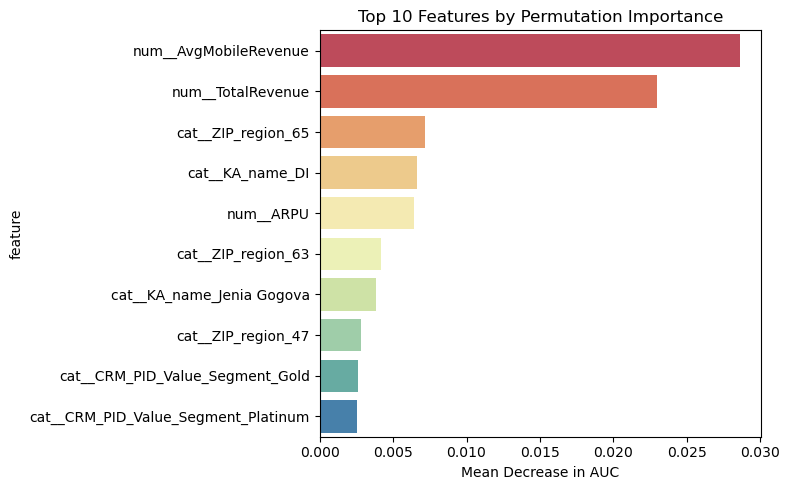

In [137]:
top10 = perm_df.head(10)
plt.figure(figsize=(8,5))
sns.barplot(
    data=top10, 
    x='importance_mean', 
    y='feature', 
    palette='Spectral'
)
plt.xlabel('Mean Decrease in AUC')
plt.title('Top 10 Features by Permutation Importance')
plt.tight_layout()
plt.show()


In [142]:
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer

# Numeric pipeline with PCA
numeric_pipeline_pca = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95, random_state=RANDOM_STATE))
])

preprocessor_pca = ColumnTransformer([
    ('num', numeric_pipeline_pca, numeric_features),
    ('cat', categorical_pipeline, categorical_features)
])

# Logistic regression pipeline with PCA
lr_pca_pipeline = Pipeline([
    ('prep', preprocessor_pca),
    ('clf', LogisticRegression(
        solver='liblinear',
        class_weight='balanced',
        random_state=RANDOM_STATE
    ))
])

# Fit model
lr_pca_pipeline.fit(X_train, y_train)
y_pred_pca = lr_pca_pipeline.predict(X_test)
y_proba_pca = lr_pca_pipeline.predict_proba(X_test)[:, 1]

print("Logistic Regression with PCA")
print(classification_report(y_test, y_pred_pca, target_names=['No Churn','Churn'], zero_division=0))
print(f"ROC AUC with PCA: {roc_auc_score(y_test, y_proba_pca):.3f}")

pca = lr_pca_pipeline.named_steps['prep'].named_transformers_['num'].named_steps['pca']
print(f"Number of PCA components used: {pca.n_components_}")
print(f"Total explained variance: {pca.explained_variance_ratio_.sum():.3f}")


Logistic Regression with PCA
              precision    recall  f1-score   support

    No Churn       0.95      0.60      0.73      1581
       Churn       0.08      0.52      0.14       110

    accuracy                           0.59      1691
   macro avg       0.51      0.56      0.44      1691
weighted avg       0.89      0.59      0.69      1691

ROC AUC with PCA: 0.572
Number of PCA components used: 5
Total explained variance: 0.971


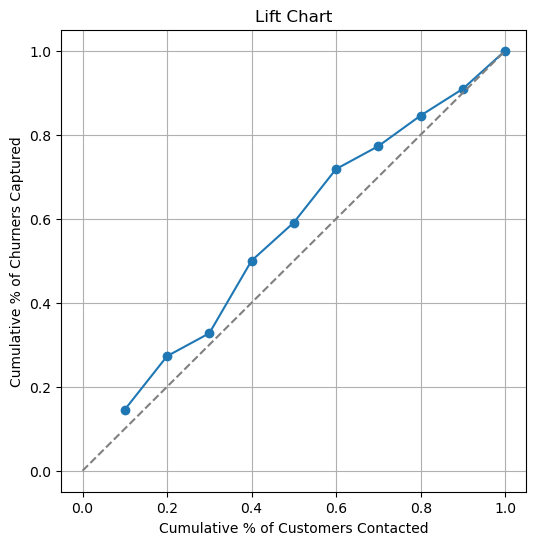

In [138]:
best_pipeline = rs_rf.best_estimator_   

# Score the test set
df_scores = X_test.copy()
df_scores['y_true']  = y_test.values
df_scores['y_score'] = best_pipeline.predict_proba(X_test)[:, 1]

# Assign deciles (1 = highest risk)
df_scores['decile'] = pd.qcut(df_scores['y_score'], 10, labels=False, duplicates='drop') + 1

# Aggregate churn rate & counts per decile
decile_stats = (
    df_scores
      .groupby('decile')
      .agg(
        churn_rate=('y_true','mean'),
        count=('y_true','size')
      )
      .sort_index(ascending=False)
      .reset_index()
)

# Plot Lift Chart
decile_stats['cum_churns']   = decile_stats['churn_rate'] * decile_stats['count']
decile_stats['cum_churn_pct']= decile_stats['cum_churns'].cumsum() / df_scores['y_true'].sum()
decile_stats['cum_cust_pct'] = decile_stats['count'].cumsum()   / df_scores.shape[0]


plt.figure(figsize=(6,6))
plt.plot(decile_stats['cum_cust_pct'], decile_stats['cum_churn_pct'], marker='o')
# random baseline
plt.plot([0,1], [0,1], linestyle='--', color='gray')  

plt.title('Lift Chart')
plt.xlabel('Cumulative % of Customers Contacted')
plt.ylabel('Cumulative % of Churners Captured')
plt.grid(True)
plt.show()

